# Análisis de Componentes Principales ACP y Análisis Fatorial AF

- [1. Análisis de Componentes Principales(ACP)](#1.-Análisis-de-Componentes_Principales-(ACP))
- [2. Análisis Factorial (AF)](#2.-Análisis-Factorial-(AF))

In [5]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-white')

# 1. Análisis de Componentes Principales(ACP)

In [6]:
# Carga de datos
df = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/USArrests.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [7]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [8]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [9]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [10]:
# Los vectores de cargas
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [11]:
# Ajuste del modelo de ACP (PCA, por sus siglas en inglés) y transformaciónde X para obtener los componentes principales
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


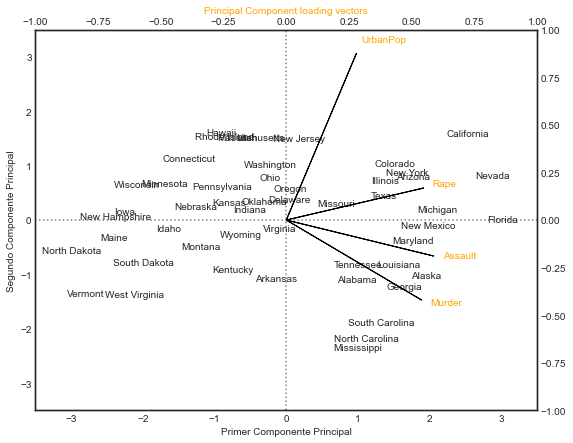

In [12]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Gráfico de los Componentes Principales 1 y 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('Primer Componente Principal')
ax1.set_ylabel('Segundo Componente Principal')
    
# Trace los vectores de carga de los componentes principales, utilizando un segundo eje y.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Trazar etiquetas para vectores. La variable 'a' es un pequeño parámetro de compensación para separar la punta de la flecha y el texto. 
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Grafique los vectores
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3]);

In [13]:
# Desviación estándar de los cuatro componentes principales
np.sqrt(pca.explained_variance_)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [14]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [15]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

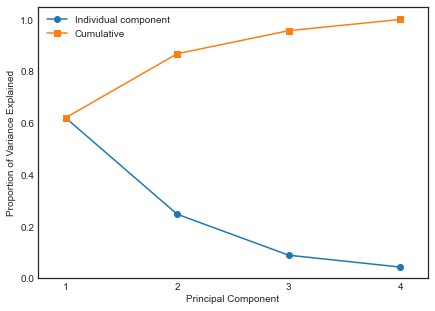

In [16]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

# 2. Análisis Factorial (AF)

In [17]:
#Para CFA, se puede seguir el tutorial de: https://semopy.com/syntax.html
#También para CFA https://github.com/EducationalTestingService/factor_analyzer
#Solo AF, más sencillo, el tutorial de: https://www.datacamp.com/community/tutorials/introduction-factor-analysis
#O también: https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor-analyzer-confirmatory-factor-analyzer-module
#O el que usa los datos de baseball:https://www.datasklr.com/principal-component-analysis-and-factor-analysis/factor-analysis

In [18]:
#Para una interpretación de las rotaciones en el análisis factorial, puede ver:
# https://www.ibm.com/docs/es/spss-statistics/25.0.0?topic=analysis-factor-rotation

In [19]:
#!pip install FactorAnalyzer

In [20]:
#Esto es siguiendo: https://www.datasklr.com/principal-component-analysis-and-factor-analysis/factor-analysis
# Create factor analysis object and perform factor analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [21]:
fa.FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation='varimax',
               rotation_kwargs={}, use_smc=True)
fa.fit(X)
fa.loadings_

array([[ 0.91516486,  0.02762848,  0.13905951,  0.        ],
       [ 0.88036791,  0.32020407, -0.09100618,  0.        ],
       [ 0.05909459,  0.64142576, -0.0160376 ,  0.        ],
       [ 0.56292624,  0.59517677,  0.22986286,  0.        ]])

In [27]:
#Con esta instrucción solo me muestra los coeficientes que son mayores que 0.4
fa.loadings_*[np.abs(fa.loadings_)>0.4]

array([[[ 0.91516486,  0.        ,  0.        ,  0.        ],
        [ 0.88036791,  0.        , -0.        ,  0.        ],
        [ 0.        ,  0.64142576, -0.        ,  0.        ],
        [ 0.56292624,  0.59517677,  0.        ,  0.        ]]])

In [35]:
#Rotaciones disponibles, ver: https://factor-analyzer.readthedocs.io/en/latest/index.html
fa=FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation='oblimin',
               rotation_kwargs={}, use_smc=True)
fa.fit(X)
#Con esta instrucción solo me muestra los coeficientes que son mayores que 0.4
fa.loadings_*[np.abs(fa.loadings_)>0.4]

array([[[ 0.8134647 ,  0.        , -0.        ,  0.        ],
        [ 0.9447341 ,  0.        ,  0.        ,  0.        ],
        [-0.        ,  0.62170273,  0.        ,  0.        ],
        [ 0.        ,  0.74677874, -0.        ,  0.        ]]])

In [38]:
#Rotaciones disponibles, ver: https://factor-analyzer.readthedocs.io/en/latest/index.html
fa=FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation='quartimax',
               rotation_kwargs={}, use_smc=True)
fa.fit(X)
#Con esta instrucción solo me muestra los coeficientes que son mayores que 0.4
fa.loadings_*[np.abs(fa.loadings_)>0.4]

array([[[ 0.9041329 , -0.        ,  0.        ,  0.        ],
        [ 0.92269891,  0.        , -0.        ,  0.        ],
        [ 0.        ,  0.6084379 , -0.        ,  0.        ],
        [ 0.69754907,  0.45943322,  0.        ,  0.        ]]])

In [39]:
help(FactorAnalyzer())

Help on FactorAnalyzer in module factor_analyzer.factor_analyzer object:

class FactorAnalyzer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  FactorAnalyzer(n_factors=3, rotation='promax', method='minres', use_smc=True, is_corr_matrix=False, bounds=(0.005, 1), impute='median', rotation_kwargs=None)
 |  
 |  A FactorAnalyzer class, which -
 |      (1) Fits a factor analysis model using minres, maximum likelihood,
 |          or principal factor extraction and returns the loading matrix
 |      (2) Optionally performs a rotation, with method including:
 |  
 |          (a) varimax (orthogonal rotation)
 |          (b) promax (oblique rotation)
 |          (c) oblimin (oblique rotation)
 |          (d) oblimax (orthogonal rotation)
 |          (e) quartimin (oblique rotation)
 |          (f) quartimax (orthogonal rotation)
 |          (g) equamax (orthogonal rotation)
 |  
 |  Parameters
 |  ----------
 |  n_factors : int, optional
 |      The number of factors to select.
